# NLP Assignment 1 (40% of grade): Text classification for Fake News Detection

This coursework will involve you implementing functions for a text classifier, which you will train to detect **fake news** in a corpus of approx. 10,000 statements, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
!pip install nltk

In [2]:
import pandas  as pd
import csv                     # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.classify import accuracy

您以后还有需要的话联系我，qq:1010677975,免得交中介费

您以后还有需要的话联系我，qq:1010677975,免得交中介费

您以后还有需要的话联系我，qq:1010677975,免得交中介费

# Question 1: Input and Basic preprocessing (10 marks)

In [9]:
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]


def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    data_line[0]=convert_label(data_line[0])
    a=(data_line[0],data_line[1])
    return a

In [10]:

# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
    a=nltk.word_tokenize(text)
    interpunctuations = [',', '.', ':', ';', '?', '(', ')', '[', ']', '&', '!', '*', '@', '#', '$', '%']
    cutwords2 = [word for word in a if word not in interpunctuations] 
    stops = set(stopwords.words("english"))
    cutwords3 = [word for word in cutwords2 if word not in stops]
    cutwords4 = []
    for cutword in cutwords3:
        cutwords4.append(PorterStemmer().stem(cutword))
    return cutwords4

# Question 2: Basic Feature Extraction (20 marks)

In [11]:


def to_feature_vector(tokens):
    global_feature_dict = {}
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    for item in tokens:
        global_feature_dict[item]=global_feature_dict.get(item,0)+1
    return global_feature_dict

In [12]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    raw_data=[]
    reader = pd.read_csv(path,delimiter='\t')
    for i in range(len(reader)):
            (label, text) = parse_data_line(reader.iloc[i,:])
            raw_data.append((text, label))
    return raw_data

def split_and_preprocess_data(percentage,path):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    train_data=[]
    test_data=[]
    raw_data=load_data(path)
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))
    return train_data ,test_data

In [13]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    model=SklearnClassifier(pipeline).train(data)
    return model

In [14]:
train_data ,test_data=split_and_preprocess_data(0.9,'fake_news.tsv')

C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_21948\909790341.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_line[0]=convert_label(data_line[0])


# Question 3: Cross-validation (20 marks)

In [15]:
#solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1
    
    for i in range(0,len(dataset),int(fold_size)):
        # insert code here that trains and tests on the 10 folds of data in the dataset
        result=train_classifier(dataset[i:i+fold_size])
        results.append(accuracy(result, test_data))
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        
    return results

In [16]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(pre_process(sample)))

In [17]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

raw_data=load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

train_data,test_data=split_and_preprocess_data(0.8,data_file_path)
global_feature_dict=to_feature_vector(train_data[0][0])

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...


C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_21948\909790341.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_line[0]=convert_label(data_line[0])


Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...


C:\Users\tang xiaoqing\AppData\Local\Temp\ipykernel_21948\909790341.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_line[0]=convert_label(data_line[0])


After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
9


In [18]:

results=cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented
results

Training Classifier...
Fold start on items 0 - 820
Training Classifier...
Fold start on items 820 - 1640
Training Classifier...
Fold start on items 1640 - 2460
Training Classifier...
Fold start on items 2460 - 3280
Training Classifier...
Fold start on items 3280 - 4100
Training Classifier...
Fold start on items 4100 - 4920
Training Classifier...
Fold start on items 4920 - 5740
Training Classifier...
Fold start on items 5740 - 6560
Training Classifier...
Fold start on items 6560 - 7380
Training Classifier...
Fold start on items 7380 - 8200


[0.5383113714006833,
 0.5685700341630063,
 0.5334309419228892,
 0.5378233284529038,
 0.5387994143484627,
 0.5134211810639336,
 0.5685700341630063,
 0.5578330893118595,
 0.5402635431918009,
 0.5519765739385066]

# 4. Error Analysis (10 marks)

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

In [21]:
preds=[]
a=train_classifier(train_data)
for i in range(len(test_data)):
    pred=predict_labels(test_data[i][0],a)
    preds.append(pred)
y_test=np.array(test_data)[:,1]
y_test
preds

Training Classifier...


[['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['FAKE'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['REAL'],
 ['FAKE'],
 ['FAKE'],
 ['REAL'],

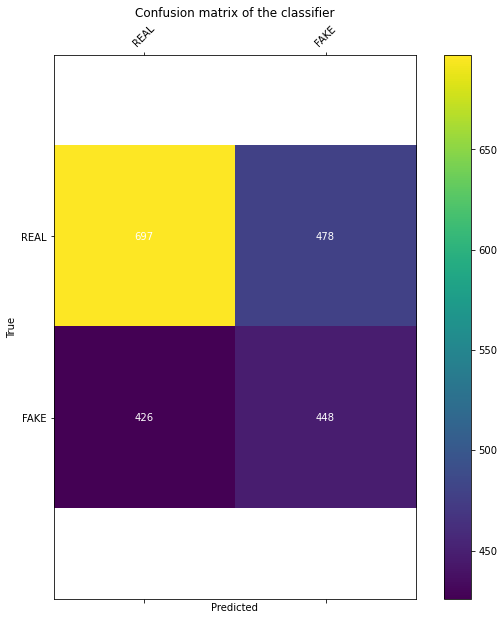

In [22]:
confusion_matrix_heatmap(preds,y_test,['REAL','FAKE'])

# Questions 5 (20%) and 6 (20%) (recommend starting a new notebook)

In [23]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'the': 1, 'bush': 1, 'tax': 1, 'cut': 1, 'help': 1, 'creat': 1, 'substanti': 1, 'part': 1, 'deficit': 1}, 'REAL')
Training Classifier...
Done training!
Precision: 0.556764
Recall: 0.558809
F Score:0.557428
